# 事前準備：共通コードの実行
このノートブックに接続したら，まずは以下の2つの共通コード（コードAとコードB）を実行する．
これらの共通コードを実行しないと，それ以降のコードが実行できないので注意する．
また，コードAとコードBは，ノートブックに接続するたび毎回実行すること（ノートブックに接続中は，何度も実行する必要はない）．  

共通コードの詳細についての説明は割愛するので，コードの内容の理解は必須とはしない（実行結果を見やすくするための「おまじない」と考えればよい）．  

In [ ]:
# コードA：日本語化ライブラリ導入
! pip install japanize-matplotlib | tail -n 1

In [2]:
# コードB：共通事前処理

#B1:余分なワーニングを非表示にする
import warnings
warnings.filterwarnings('ignore')

#必要ライブラリのimport
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib #matplotlib日本語化対応
import seaborn as sns

#B2:データフレーム表示用関数
from IPython.display import display

#B3:表示オプション調整
np.set_printoptions(suppress = True, precision = 3) #numpyの浮動小数点の表示精度
pd.options.display.float_format = '{:.3f}'.format #pandasでの浮動小数点の表示精度
pd.set_option('display.max_columns', None) #データフレームですべての列データを表示

#B4:グラフのデフォルトフォント指定
plt.rcParams['font.size'] = 14

#乱数の種
random_seed = 123

## コードAの補足
このコードは，Pythonのパッケージを管理するためのシステムである`pip`を使用して，japanize-matplotlibというライブラリをインストールし，その出力の最後の1行だけを表示する．
  
*  `! pip install japanize-matplotlib`: `pip`の`install`コマンドを使って，japanize-matplotlibパッケージをインストールする．japanize-matplotlibは，Matplotlibライブラリで日本語の文字表示を可能にするためのパッケージである．
*  `| tail -n 1`: Unix/Linuxの`tail`コマンドを使って，インストールプロセスの出力のうち最後の1行のみを表示する．パイプ`|`によって，`install`コマンドの出力が`tail`コマンドの入力となる．`-n 1`オプションは，末尾から1行だけを取得することを指定している．  
  
このコードは，Jupyter NotebookやGoogle ColaboratoryのようなPythonのインタラクティブな実行環境で使用されることが多い．`!`をコマンドの前に付けることで，Python環境内からシステムのコマンドを実行することができる．この場合，japanize-matplotlibのインストールが成功したかどうか，または関連する最後のメッセージを確認するために使われています．

## コードBの補足
### B1:余分なワーニングを非表示にする
この部分のコードで，コード実行後に表示される警告メッセージを非表示にしている．具体的には，Pythonの標準ライブラリである`warnings`モジュールの`filterwarnings`関数を使用する．`warnings`モジュールは、開発者（プログラマ）に警告（非致命的なエラーなど）を発するためのモジュールである．  
  
*  `import warnings`: `warnings`モジュールをインポートする．
*  `warnings.filterwarnings('ignore')`: `filterwarnings`関数を使って，発生する警告を非表示にする（無視する）．

この処理は，特定の警告が表示されることがわかっており，それによる出力が実行結果の可読性を損なう場合などに使われる（本講義でもこの目的で使っている）．ただし，警告メッセージはコードに潜在的な問題があることを知らせる重要な手がかりを提供するので，慎重に使用する必要がある．

### B2:データフレーム表示用関数
この部分のコードで，`IPython.display`モジュールから`display`関数をインポートしている．`IPython.display`モジュールは，IPython環境（Jupyter NotebookやGoogle Colaboratoryを含む）内でリッチなウェブベースのコンテンツを表示するためのツール群を提供する．

`display`関数は，様々な形式のデータやメディアを豊かに表示するために使われる。．例えば，HTML，画像，DataFrame等の表示が含まれる．この関数を使用することで，標準の出力よりも見やすい表示にできる．

### B3:表示オプション調整
この部分のコードで，NumPyとPandasを使用する際の小数点以下の桁数表示を設定している．

*  `np.set_printoptions(suppress = True, precision = 3)`:
    *  `suppress = True`: 指数表記（例: `1e-4`）を使用しない．
    *  `precision = 3`: 表示する小数点以下の桁数を3桁に設定する．
    *  これにより，NumPyの配列の各要素が小数点以下3桁までの精度で表示される．
*  `pd.options.display.float_format = '{:.3f}'.format`:
    * PandasのDataFrameやSeries内のデータ型がfloatの数値に対するフォーマットを設定する．
    * `'{:.3f}'.format`: 小数点以下3桁までの精度で表示するように設定している．
*  `pd.set_option('display.max_columns', None)`:
    *  `pd.set_option`: DataFrameの表示行数や列数などが指定できる．
    *  `display.max_columns`: 表示する最大のカラム数を指定する．
    *  `display.max_columns`の後ろに`None`を設定することで，DataFrameの列数の制限をなくし，利用可能なすべての列を表示することができる．


### B4:グラフのデフォルトフォント指定
この部分のコードで，matplotlibのグラフにおける文字サイズを設定している．`plt.rcParams`には，matplotlibのデフォルト設定が格納されている辞書型のデータ（辞書）である．この辞書を通じて，グラフの様々な視覚的要素（文字サイズ，線の太さ，色など）のデフォルト値を設定できる．
  
`plt.rcParams['font.size'] = 14`で，グラフ内のテキスト（タイトル，軸ラベル，凡例など）のデフォルトの文字サイズを14ポイントに設定している．








# Seriesの基本操作
Seriesは複数の値を要素として持ち，各要素には「インデックス」を割り当てることができる．  
Series定義の書式:
`pd.Series(値を要素に持つリスト, index=インデックスのリスト)`  
※`pd`は`pandas`のこと


|基本操作の書式|内容|
|:--|:--|
|`se.index`|Seriesのインデックス|
|`se['インデックス名']`|インデックスによる要素指定|
|`se.unique()`|重複排除結果を返すメソッド|
|`se.value_counts()`|要素の値ごとのデータ数を集計するメソッド |
|`se.sort_values(ascending=[True or False])`|要素を並べ替えるメソッド（`True`で昇順（デフォルト），`False`で降順）|
|`se.map(関数名)`|各データに関数を適用するメソッド|
|`se 演算子 値`|各要素と値の演算結果を返す|
|`se[条件式]`|条件式による検索結果を返す|


※表内の「`se`」は任意のSeries（オブジェクト）

## Seriesの定義

In [ ]:
score = pd.Series([90, 70, 70, 80], index = ['工藤', '浅木', '松田', '瀬川']) #Seriesの定義
print(score)

工藤    90
浅木    70
松田    70
瀬川    80
dtype: int64


## インデックスの参照と要素指定

In [ ]:
score = pd.Series([90, 70, 70, 80], index = ['工藤', '浅木', '松田', '瀬川']) #Seriesの定義
print(score.index) #インデックスの参照
print(score['松田']) #インデックスによる要素指定

Index(['工藤', '浅木', '松田', '瀬川'], dtype='object')
70


## 重複排除

In [ ]:
score = pd.Series([90, 70, 70, 80], index = ['工藤', '浅木', '松田', '瀬川']) #Seriesの定義
print(score.unique()) #重複排除結果表示

[90 70 80]


### 参考
*  以下のコードの実行結果は，`score` シリーズオブジェクトの `unique` メソッド自体を表している
*  `unique` メソッドが実際に呼び出されているわけではなく，そのメソッドオブジェクト自体が`print`関数の引数となって表示されている
*  メソッド名の後ろに括弧がない場合，実際にメソッドが呼び出されるのではなく，オブジェクト自身が指定されていることになる
*  Pythonでは，取り扱われるすべてのデータ（関数，クラス，メソッド等）がオブジェクトとなるので，`変数.unique`はオブジェクトとなり，`print(変数.unique)`を実行すると`unique`メソッドオブジェクト自身が表示されることになる
*  また，すべてのメソッドは`method`クラスのオブジェクトなので，他のメソッドでも同様の実行結果となる
*  メソッドを呼び出す場合には，必ず`()`を記述する
*  この`()`は演算子の一つで「呼び出し演算子」と呼ぶ

In [8]:
score = pd.Series([90, 70, 70, 80], index = ['工藤', '浅木', '松田', '瀬川']) #Seriesの定義
print(score.unique) #括弧を入れてない
print(type(score.unique))
print(type(score.unique()))

<bound method Series.unique of 工藤    90
浅木    70
松田    70
瀬川    80
dtype: int64>
<class 'method'>
<class 'numpy.ndarray'>


## データ数の集計

In [4]:
score = pd.Series([90, 70, 70, 80], index = ['工藤', '浅木', '松田', '瀬川']) #Seriesの定義
print(score.value_counts()) #データ数の集計結果表示

70    2
90    1
80    1
Name: count, dtype: int64


## 並べ替え（ソート）

In [5]:
score = pd.Series([90, 70, 70, 80], index = ['工藤', '浅木', '松田', '瀬川']) #Seriesの定義
print(score.sort_values()) #並べ替えた結果を表示

浅木    70
松田    70
瀬川    80
工藤    90
dtype: int64


## 演算処理

In [6]:
score = pd.Series([90, 70, 70, 80], index = ['工藤', '浅木', '松田', '瀬川']) #Seriesの定義
print(score >= 80) #演算結果を表示（要素の値が80以上であればTrue）

工藤     True
浅木    False
松田    False
瀬川     True
dtype: bool


In [7]:
score = pd.Series([90, 70, 70, 80], index = ['工藤', '浅木', '松田', '瀬川']) #Seriesの定義
print(score + 5) #演算結果を表示（要素の値に+5する）

工藤    95
浅木    75
松田    75
瀬川    85
dtype: int64


## 検索

In [9]:
score = pd.Series([90, 70, 70, 80], index = ['工藤', '浅木', '松田', '瀬川']) #Seriesの定義
print(score[score >= 80]) #条件式による検索結果を表示（80以上の要素を表示）

工藤    90
瀬川    80
dtype: int64


# DataFrameの基本操作
DataFrameは表形式（行列形式）の形で値を持ち，各行に対してindex（インデックス）を，各列に対してcolumns（列名）を割り当てることができる．したがって，indexとcolumnsの組で一つの要素を指定できる．
  
DataFrame定義の書式:  
`pd.DataFrame(リストを要素に持つリスト, index=インデックスのリスト, columns=列名のリスト)`  
※`pd`は`pandas`のこと


|基本操作の書式|内容|
|:--|:--|
|`df.index`|DataFrameのインデックス|
|`df.columns`|DataFrameの列名|
|`df.shape`|DataFrameの行数と列数|
|`df.head()`|DataFrameの先頭の数行を返すメソッド|
|`df.tail()`|DataFrameの末尾の数行を返すメソッド|
|`df[列名のリスト]`|特定の列を返す|
|`df.loc[インデックスのリスト]`|特定の行の返す|
|`df[条件式]`|条件式による検索結果を返す|
|`df.loc[インデックスのリスト, 列名のリスト]`|指定した行と列に対応する要素を返す|
|`df.loc[インデックス] = ～`|行の追加・更新|
|`df['列名'] = ～`|列の追加・更新|
|`df.drop(インデックスのリスト, axis = 0)`|指定した行を削除するメソッド|
|`df.drop(列名のリスト, axis = 1)`|指定した列を削除するメソッド|
|`df.T`|行と列を入れ替える（転置）|
|`df.to_csv('ファイルの名前')`|DataFrameをcsvファイルに書き込むメソッド|
|`pd.resd_csv('ファイルの場所・名前')`|csvファイルをDataFrameに読み込むメソッド|

※表内の「`df`」は任意のDataFrame（オブジェクト）
※表内の「`pd`」は「pandas」のこと

## DataFrameの定義
`display`関数は，DataFrameを（`print`関数より）見やすい形で表示する関数である．

In [10]:
score_df = pd.DataFrame([[90, 70], [70, 80], [70, 80], [85, 70]],
                        index = ['工藤', '浅木', '松田', '福田'],
                        columns = ['Python', 'ML']) #DataFrameの定義
display(score_df)

,Python,ML
工藤,90,70
浅木,70,80
松田,70,80
福田,85,70


*  実行結果の直後に表示される「View recommended plots」をクリックすると，DataFrameに対するグラフ表示のコードを提案してくれる（Google Claboratoryの機能）
*  本講義では利用しないので，特に気にしなくてよい

In [11]:
# 上のコードと同じ結果となる）
data = [[90, 70], [70, 80], [70, 80], [85, 70]]
idx = ['工藤', '浅木', '松田', '福田']
col = ['Python', 'ML']
score_df = pd.DataFrame(data, index = idx, columns = col) #DataFrameの定義
display(score_df)

,Python,ML
工藤,90,70
浅木,70,80
松田,70,80
福田,85,70


## インデックスと列名の参照
*  インデックスと列名は，あとから変更することもできる
*  また，for文の制御記述としてリストと同様に利用できる

In [ ]:
score_df = pd.DataFrame([[90, 70], [70, 80], [70, 80], [85, 70]],
                        index = ['工藤', '浅木', '松田', '福田'],
                        columns = ['Python', 'ML'])
print(score_df.index) #インデックスの表示
print(score_df.columns) #列名の表示

Index(['工藤', '浅木', '松田', '福田'], dtype='object')
Index(['Python', 'ML'], dtype='object')


## 列数と行数の参照

In [ ]:
score_df = pd.DataFrame([[90, 70], [70, 80], [70, 80], [85, 70]],
                        index = ['工藤', '浅木', '松田', '福田'],
                        columns = ['Python', 'ML'])
print(score_df.shape) #行数と列数を表示

(4, 2)


## 先頭・末尾の数行を返すメソッド

In [13]:
score_df = pd.DataFrame([[90, 70], [70, 80], [70, 80], [85, 70]],
                        index = ['工藤', '浅木', '松田', '福田'],
                        columns = ['Python', 'ML'])
display(score_df.head(1)) #先頭1行を表示
print('----------------------------------')
display(score_df.tail(2)) #末尾2行を表示

,Python,ML
工藤,90,70


----------------------------------


,Python,ML
松田,70,80
福田,85,70


## 列名を指定して列データを抽出
*  DataFrame名の後ろに列名のリストを角括弧`[ ]`で囲って記述することで任意の列データを抽出できる

In [17]:
score_df = pd.DataFrame([[90, 70], [70, 80], [70, 80], [85, 70]],
                        index = ['工藤', '浅木', '松田', '福田'],
                        columns = ['Python', 'ML'])
display(score_df[['ML']]) #ML列を抽出

,ML
工藤,70
浅木,80
松田,80
福田,70


*  . (ドット) を利用しても同じ結果が得られる
*  書式: `df.列名`  
*  例: `score_df.Python`

## インデックスを指定して行データを抽出
*  DataFrameに対する`loc`メソッドを使うことで行データを抽出できる
*  `loc`の後ろにインデックスのリストを角括弧`[ ]`で囲って記述することで任意の行データを抽出できる
*  また，: (コロン) で行番号の範囲を指定することで，特定の範囲の行を抽出できる
*  例: `df[10:15]`

In [18]:
score_df = pd.DataFrame([[90, 70], [70, 80], [70, 80], [85, 70]],
                        index = ['工藤', '浅木', '松田', '福田'],
                        columns = ['Python', 'ML'])
display(score_df.loc[['浅木', '福田']]) #浅木と福田の行を抽出

,Python,ML
浅木,70,80
福田,85,70


## インデックスと列名を指定してデータを抽出
*  `loc`メソッドを用いる
*  `loc`の後ろの角括弧`[ ]`の中に**インデックスのリスト**, **列名のリスト**を記述することで任意の要素を抽出できる

In [ ]:
#コード2-5h
import pandas as pd
score_df = pd.DataFrame([[90, 70], [70, 80], [70, 80], [85, 70]],
                        index = ['工藤', '浅木', '松田', '福田'],
                        columns = ['Python', 'ML'])
#工藤と松田の行のPython列の要素を抽出
display(score_df.loc[['工藤', '松田'], ['Python']])
# 下のコードだと列名がちゃんと表示されない
# display(score_df.loc[['工藤', '松田'], 'Python'])

,Python
工藤,90
松田,70


連続した行や列を指定する場合は，リストのスライス指定と同様の指定方法が利用できる．

*  `A:B` ⇒ `A`以上`B`以下
*  `A:` ⇒ `A`以上すべて
*  `:B` ⇒ `B`以下すべて
* `:` ⇒ すべて

In [19]:
score_df = pd.DataFrame([[90, 70], [70, 80], [70, 80], [85, 70]],
                        index = ['工藤', '浅木', '松田', '福田'],
                        columns = ['Python', 'ML'])
#工藤から松田の行の全列の要素を抽出
display(score_df.loc['工藤':'松田', :])

,Python,ML
工藤,90,70
浅木,70,80
松田,70,80


## 条件式による検索

In [22]:
score_df = pd.DataFrame([[90, 70], [70, 80], [70, 80], [85, 70]],
                        index = ['工藤', '浅木', '松田', '福田'],
                        columns = ['Python', 'ML'])
display(score_df[score_df['Python'] >= 80]) #Python列が80以上の行を抽出
# display(score_df.loc[score_df['Python'] >= 80]) #上と同じ

,Python,ML
工藤,90,70
福田,85,70


### 論理演算子の利用
*  論理演算子 `&`, `|`, `~` を利用することで，より詳細な条件式が指定できる

|論理演算子|意味|
|:-:|:--|
| `&` (and) | 両者を満たす（両者ともTrueの）ときTrue |
| `\|` (or) | どちらか片方を満たす（少なくともどちらか一方がTrueの）ときTrue |
| `~` (not) | 満たさない（Falseの）ときTrue |

In [23]:
score_df = pd.DataFrame([[90, 70], [70, 80], [70, 80], [85, 70]],
                        index = ['工藤', '浅木', '松田', '福田'],
                        columns = ['Python', 'ML'])
#Python列が80未満，かつML列が70以上の行を抽出
display(score_df[(score_df['Python'] < 80) & (score_df['ML'] >= 70)])

,Python,ML
浅木,70,80
松田,70,80


## 列の追加・更新

In [ ]:
score_df = pd.DataFrame([[90, 70], [70, 80], [70, 80], [85, 70]],
                        index = ['工藤', '浅木', '松田', '福田'],
                        columns = ['Python', 'ML'])
#Python列のデータを[90, 70, 70, 85]から[95, 75, 70, 80]に更新
score_df['Python'] = [95, 75, 70, 80]
display(score_df)

,Python,ML
工藤,95,70
浅木,75,80
松田,70,80
福田,80,70


In [24]:
score_df = pd.DataFrame([[90, 70], [70, 80], [70, 80], [85, 70]],
                        index = ['工藤', '浅木', '松田', '福田'],
                        columns = ['Python', 'ML'])
#列データ（Web列）を追加
score_df['Web'] = [85, 75, 70, 80]
display(score_df)

,Python,ML,Web
工藤,90,70,85
浅木,70,80,75
松田,70,80,70
福田,85,70,80


## 行の追加・更新

In [25]:
score_df = pd.DataFrame([[90, 70], [70, 80], [70, 80], [85, 70]],
                        index = ['工藤', '浅木', '松田', '福田'],
                        columns = ['Python', 'ML'])
#工藤行のデータを[90, 70]から[95, 75]に更新
score_df.loc['工藤'] = [95, 75]
display(score_df)

,Python,ML
工藤,95,75
浅木,70,80
松田,70,80
福田,85,70


In [26]:
score_df = pd.DataFrame([[90, 70], [70, 80], [70, 80], [85, 70]],
                        index = ['工藤', '浅木', '松田', '福田'],
                        columns = ['Python', 'ML'])
#行データ（山本行）を追加
score_df.loc['山本'] = [75, 75]
display(score_df)

,Python,ML
工藤,90,70
浅木,70,80
松田,70,80
福田,85,70
山本,75,75


## 行と列の削除
*  `drop`メソッドで，行や列を削除できる
*  ただし，メソッドを適用した後も元のDataFrameは変わらない

In [27]:
score_df = pd.DataFrame([[90, 70], [70, 80], [70, 80], [85, 70]],
                        index = ['工藤', '浅木', '松田', '福田'],
                        columns = ['Python', 'ML'])
#列データ（Python列）を削除して表示
display(score_df.drop(['Python'], axis = 1))

,ML
工藤,70
浅木,80
松田,80
福田,70


In [28]:
score_df = pd.DataFrame([[90, 70], [70, 80], [70, 80], [85, 70]],
                        index = ['工藤', '浅木', '松田', '福田'],
                        columns = ['Python', 'ML'])
#行データ（松田行）を削除して表示
display(score_df.drop(['松田'], axis = 0))

,Python,ML
工藤,90,70
浅木,70,80
福田,85,70


## 行と列の入れ替え（転置）
*  DataFrameの後ろに「`.T`」を付けることで行と列を入れ替えることができる
*  ただし，「`.T`」を適用した後も元のDataFrameは変わらない

In [29]:
score_df = pd.DataFrame([[90, 70], [70, 80], [70, 80], [85, 70]],
                        index = ['工藤', '浅木', '松田', '福田'],
                        columns = ['Python', 'ML'])
#行と列を入れ替えて表示
display(score_df.T)

,工藤,浅木,松田,福田
Python,90,70,70,85
ML,70,80,80,70


## csvファイルの読み込みとcsvファイルへの書き込み
*  csv(Comma Separated Values)ファイルとは，各要素がカンマ「`,`」で区切られたテキストファイルのことで，テキストエディタ（メモ帳など）やExcelで開くことができる
*  `to_csv`メソッドでDataFrameをcsvファイルに書き込むことができ，`read_csv`メソッドで既存のcsvファイルをDataFrameとして読み込むことができる
*  Google Colaboratoryにおいて，書き込みによって作成されるcsvファイルは，ノートブック左のフォルダの形のアイコンをクリックすることで現れるフォルダに保存される
*  また，csvファイルを読み込む際は，このフォルダ内にcsvファイルをアップロードしておく必要がある

In [30]:
score_df = pd.DataFrame([[90, 70], [70, 80], [70, 80], [85, 70]],
                        index = ['工藤', '浅木', '松田', '福田'],
                        columns = ['Python', 'ML'])
#DataFrameをcsvファイルに書き込む
score_df.to_csv('sample.csv', index=True)
#実行画面には何も表示されない

*  `index`が`True`だとインデックスも書き込まれる．一方，`index`が`False`だとインデックスが省略される
*  `read_csv`メソッドの引数には，csvファイルのURLも指定できる
*  例として，以下のURLにあるcsvファイル（インデックス有）の読み込みを行う
>*  https://bit.ly/3DmHfDw
*  また，引数に`index_col`を指定すると，インデックスとして使いたい列を番号で指定できる（列番号は0から始まる）．

In [31]:
#変数urlにcsvファイルの場所（URL）を代入
url = 'https://bit.ly/3DmHfDw'
#csvファイルをDataFrameに変換して変数score_dfに代入
score_df = pd.read_csv(url, index_col=0)
display(score_df)

,Python,ML
工藤,90,70
浅木,70,80
松田,70,80
福田,85,70


*  別例として，以下のURLにあるcsvファイル（インデックス無）の読み込みを行う
>*  https://bit.ly/4h1CgG8
*  インデックスがないcsvファイルを読み込むと，自動的に0から始まるインデックスが付く

In [32]:
url = 'https://bit.ly/4h1CgG8'
score_df = pd.read_csv(url)
display(score_df)

,Python,ML
0,90,70
1,70,80
2,70,80
3,85,70


# DataFrameの応用操作
|操作の書式|内容|
|:--|:--|
|`df.sum()`／`df['列名'].sum()`|合計を計算する集計メソッド|
|`df.mean()`／`df['列名'].mean()`|平均を計算する集計メソッド|
|`df.median()`／`df['列名'].median()`|中央値を計算する集計メソッド|
|`df.mode()`／`df['列名'].mode()`|最頻値を計算する集計メソッド|
|`df.var(ddof = 0 or 1)`／`df['列名'].var(ddof = 0 or 1)`|標本分散・不偏分散を計算する集計メソッド|
|`df.std()`／`df['列名'].std()`|標準偏差を計算する集計メソッド|
|`df.min()`／`df['列名'].min()`|最小値を計算する集計メソッド|
|`df.max()`／`df['列名'].max()`|最大値を計算する集計メソッド|
|`df.count()`／`df['列名'].count()`|データ数を数えるメソッド|
|`df.describe()`|各種基本統計量を一括で計算する集計メソッド|
|`df.groupby(集計対象).集計メソッド()`|グループ集計|
|`pd.pivot_table()`|ピボットテーブル集計|
|`pd.concat([df1, df2], axis = [0 or 1])`|DataFrameの単純な結合|
|`df1.merge(df2, how = 結合の種類)`|DataFrameの内部結合・外部結合|
|`pd.merge(df1, df2, how = 結合の種類)`|DataFrameの内部結合・外部結合|
|`df.isnull()`|欠損値の確認|
|`df.dropna(axis = 0)`|欠損値のある行を削除|
|`df.dropna(axis = 1)`|欠損値のある列を削除|
|`df.fillna(穴埋めする値)`／`df['列名'].fillna(穴埋めする値)`|欠損値を穴埋め|
|`df.interpolate(limit_direction = 補間方法)`|線形補間|
|`pd.get_dummies(df, drop_first = True or False)`|ダミー変数の作成|
|`df.plot(kind = グラフの種類, title = グラフのタイトル)`|グラフの作成|


※表内の「`df`」「`df1`」「`df2`」は任意のDataFrame（オブジェクト）
※表内の「`pd`」は「pandas」のこと

# 1次元データの要約

## データの読み込み
データ例として，以下のURLにあるcsvファイルを用いる．

https://bit.ly/3TZG8zr

このデータは架空の試験結果になっており，1000人分の英語，国語，数学，社会，理科の得点とそれらの合計得点を示している．  

**［コード3-1の処理内容］**
*  2行目: ファイルのURLを変数`url`に代入
*  3行目: Pandasの`read_csv`関数を使って，ファイルをDataFrameとして読み込んで，変数`df_exam`に代入
*  4行目: `display`関数を使ってデータ（`df_exam`の内容）を表示


In [ ]:
#コード3-1
url = 'https://bit.ly/3TZG8zr'
df_exam = pd.read_csv(url)
display(df_exam)

,english,japanese,math,social,science,total
0,36,40,35,68,35,214
1,47,87,57,86,56,333
2,73,68,87,93,90,411
3,47,96,63,88,63,357
4,85,83,89,91,92,440
...,...,...,...,...,...,...
995,52,65,57,62,57,293
996,50,67,39,61,37,254
997,69,86,68,80,69,372
998,56,51,30,100,29,266


##1次元データの数値化

###各種統計量の計算
`describe`メソッドを使うと代表的な統計量を一括で計算できる．

*  **count**: データ数
*  **mean**: 算術平均
*  **std**: 標準偏差
*  **min**: 最小値
*  **25%**:　第1四分位数
*  **50%**:　中央値
*  **75%**:　第3四分位数
*  **max**： 最大値

In [ ]:
#コード3-2
url = 'https://bit.ly/3TZG8zr'
df_exam = pd.read_csv(url)
display(df_exam.describe())

,english,japanese,math,social,science,total
count,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000
mean,64.591,64.701,64.635,63.940,65.453,323.320
std,20.124,20.522,20.728,20.109,22.516,56.745
min,30.000,30.000,30.000,30.000,26.000,171.000
25%,48.000,47.000,46.000,47.000,45.000,284.000
50%,64.000,64.000,66.000,63.000,67.000,325.000
75%,81.000,83.000,83.000,80.000,85.000,364.000
max,100.000,100.000,100.000,100.000,100.000,488.000


##1次元データの可視化

###ヒストグラムの作成
ヒストグラムを作成する場合はpyplotの`hist`関数を使う．
*  引数には1次元データを指定する
*  DataFrameの場合は1列のみを引数に指定する
*  DataFrameの特定の列は「`DataFrame['列インデックス']`」で指定できる
*  引数に「`bins = 階級数`」を指定することで階級数が指定できる
  
以下のサンプルコードの補足：
*  `exam['total']`でインデックス「total」の列のみを指定
*  `xlabel`関数と`ylabel`関数で横軸と縦軸の名前を指定
*  `show`関数を呼び出すとそれまでに設定したグラフを実行画面に表示する（引数なし）※このコードの場合は呼び出さなくても実行できる

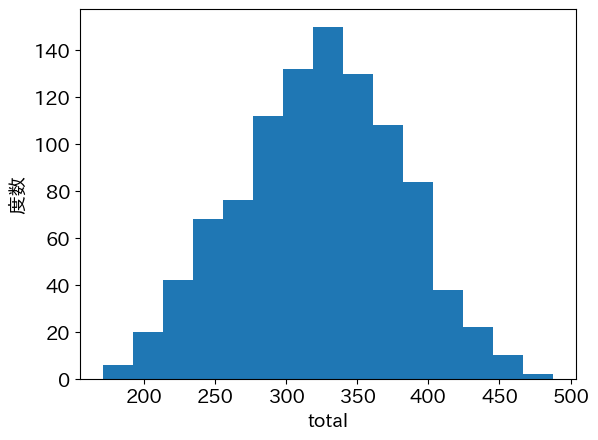

In [ ]:
#コード3-3a
url = 'https://bit.ly/3TZG8zr'
df_exam = pd.read_csv(url)
#合計得点（total列）のヒストグラムを作成
plt.hist(df_exam['total'], bins=15)
#横軸のラベルを「total」とする
plt.xlabel('total')
#縦軸のラベルを「度数」とする
plt.ylabel('度数')
plt.show()

###箱ひげ図の作成
pyplotの`boxplot`関数で箱ひげ図が作成できる．引数にDataFrameを指定すると，すべての列データに対する箱ひげ図が作成される．また，特定の列を指定することもできる．

以下のサンプルコードの補足:  
*  DataFrameの1列のみ（total列）を引数に指定
*  `xticks`関数は目盛を設定する関数
    *  1つ目の引数に座標値（数値）を指定
    *  2つ目の引数に置き換え文字列を指定
    *  `plt.xticks([1, 2], ['english', 'japanese'])` ⇒ 座標値が1のところをenglish，2のところをjapaneseに置き換える

箱ひげ図の見方:
*  箱の上底： 第3四分位点
*  箱の下底： 第1四分位点
*  箱の中の線： 中央値
*  ひげ（箱から伸びている線）の上端／下端： 最大値／最小値（外れ値を除く）
*  白丸○: 外れ値
*  最大値・最小値の外側の円：外れ値

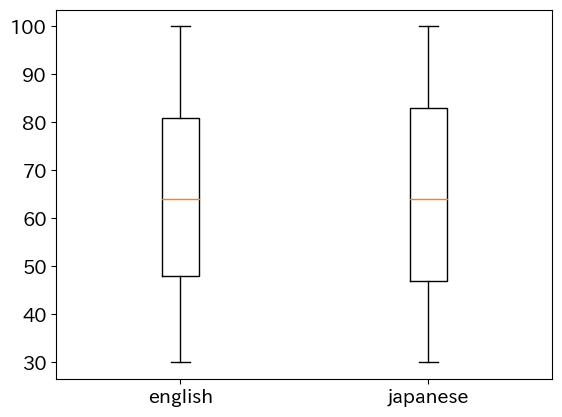

In [ ]:
#コード3-3b
url = 'https://bit.ly/3TZG8zr'
df_exam = pd.read_csv(url)
#english列とjapanese列の箱ひげ図を作成
plt.boxplot(df_exam[['english', 'japanese']])
#横軸のラベルを設定
plt.xticks([1, 2], ['english', 'japanese'])
plt.show()

###バイオリンプロットの作成
バイオリンプロットは，箱ひげ図に分布の曲線を加えたような図で，pyplotの`violinplot`関数を使って作成できる．箱ひげ図と同様に，`violinplot`関数の引数にDataFrameを指定すると，すべての列データに対するバイオリンプロットが作成される．また，特定の列を指定することもできる．

また，`showmedians`を引数に指定することで，中央値を示す線の表示・非表示が設定できる
*  `showmedians = True`: 表示
*  `showmedians = False`: 非表示（デフォルト）

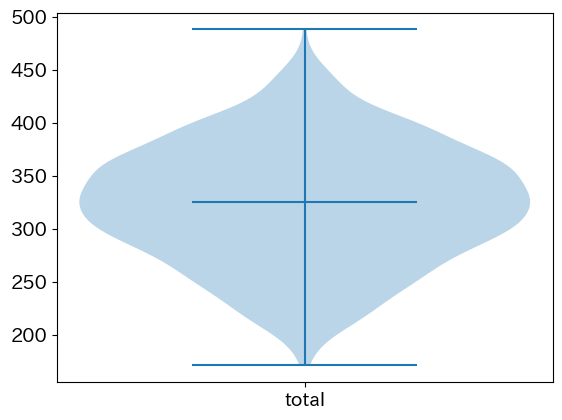

In [ ]:
#コード3-3c
url = 'https://bit.ly/3TZG8zr'
df_exam = pd.read_csv(url)
#合計得点（total列）のバイオリンプロットを作成
plt.violinplot(df_exam['total'], showmedians = True)
#横軸のラベルを「total」とする
plt.xticks([1], ['total'])
plt.show()

#2次元データの要約

##データの読み込み
データ例として，以下のURLにあるcsvファイルを用いる．

https://bit.ly/3FjLfTk

このデータは架空の試験結果になっており，20人分の5科目試験（国語，数学，英語，理科，社会）の得点を示している．

In [ ]:
#コード3-4a
url = 'https://bit.ly/3FjLfTk'
df_exam2 = pd.read_csv(url)
display(df_exam2)

,国語,数学,英語,理科,社会
0,84,63,85,64,86
1,80,64,76,69,80
2,77,66,81,68,78
3,81,73,86,78,81
4,78,70,81,74,75
5,69,71,77,74,72
6,72,70,76,72,82
7,63,63,71,74,65
8,66,53,67,62,72
9,70,65,72,66,68


##散布図の作成
pypolotの`scatter`関数で散布図を作成できる．`scatter`関数の引数にDataFrameの列データを2つ指定する．
*  1つ目の引数: 横軸に取りたいデータの列名
*  2つ目の引数: 縦軸に取りたいデータの列名

また，`xlabel`関数，`ylabel`関数で各軸のラベルを設定できる．

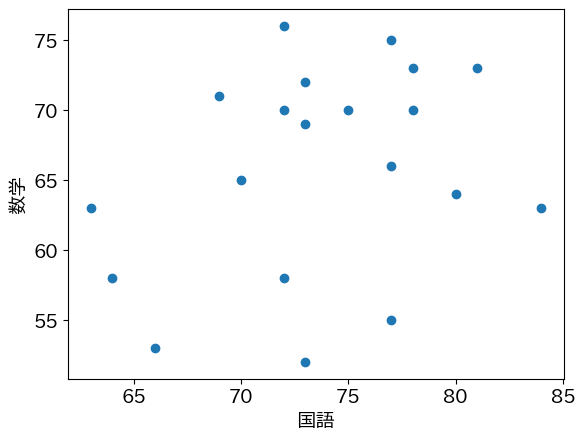

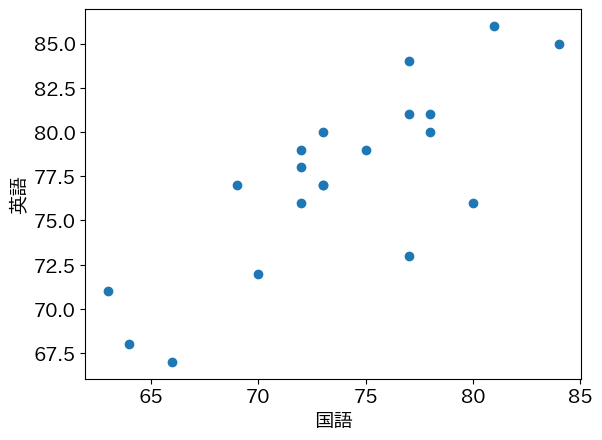

In [ ]:
#コード3-4b
url = 'https://bit.ly/3FjLfTk'
df_exam2 = pd.read_csv(url)
#国語と数学の散布図
plt.scatter(df_exam2['国語'], df_exam2['数学'])
plt.xlabel('国語')
plt.ylabel('数学')
plt.show()
#国語と英語の散布図
plt.scatter(df_exam2['国語'], df_exam2['英語'])
plt.xlabel('国語')
plt.ylabel('英語')
plt.show()

(array([60., 65., 70., 75., 80., 85., 90.]), [Text(60.0, 0, '60'), Text(65.0, 0, '65'), Text(70.0, 0, '70'), Text(75.0, 0, '75'), Text(80.0, 0, '80'), Text(85.0, 0, '85'), Text(90.0, 0, '90')])
(array([60.]), [Text(60.0, 0, 'total')])


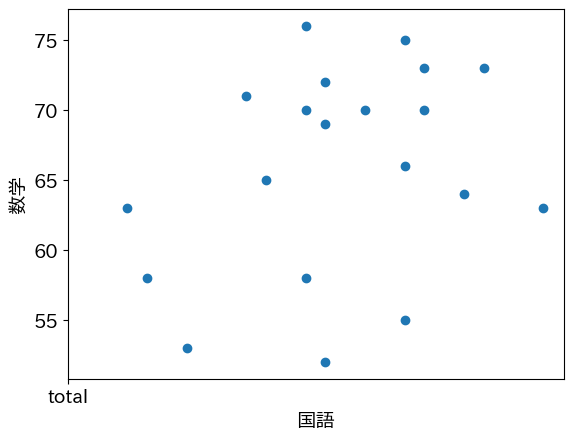

In [ ]:
#参考
url = 'https://bit.ly/3FjLfTk'
df_exam2 = pd.read_csv(url)
#国語と数学の散布図
plt.scatter(df_exam2['国語'], df_exam2['数学'])
plt.xlabel('国語')
plt.ylabel('数学')
print(plt.xticks())
plt.xticks([60.], ['total'])
plt.show()

##散布図行列の作成
複数の変数の組合せに対する散布図を行列の形式で並べたものを散布図行列と呼ぶ（対角成分の位置には各変数のヒストグラムを描画）．  
  
散布図行列を作成するにはseabornモジュールの`pairplot`関数を用いる．
`pairplot`関数の引数には，DataFrameの複数の列データを指定する．また，DataFrame自身を引数とすると，すべての列データに対する散布図行列が作成される．

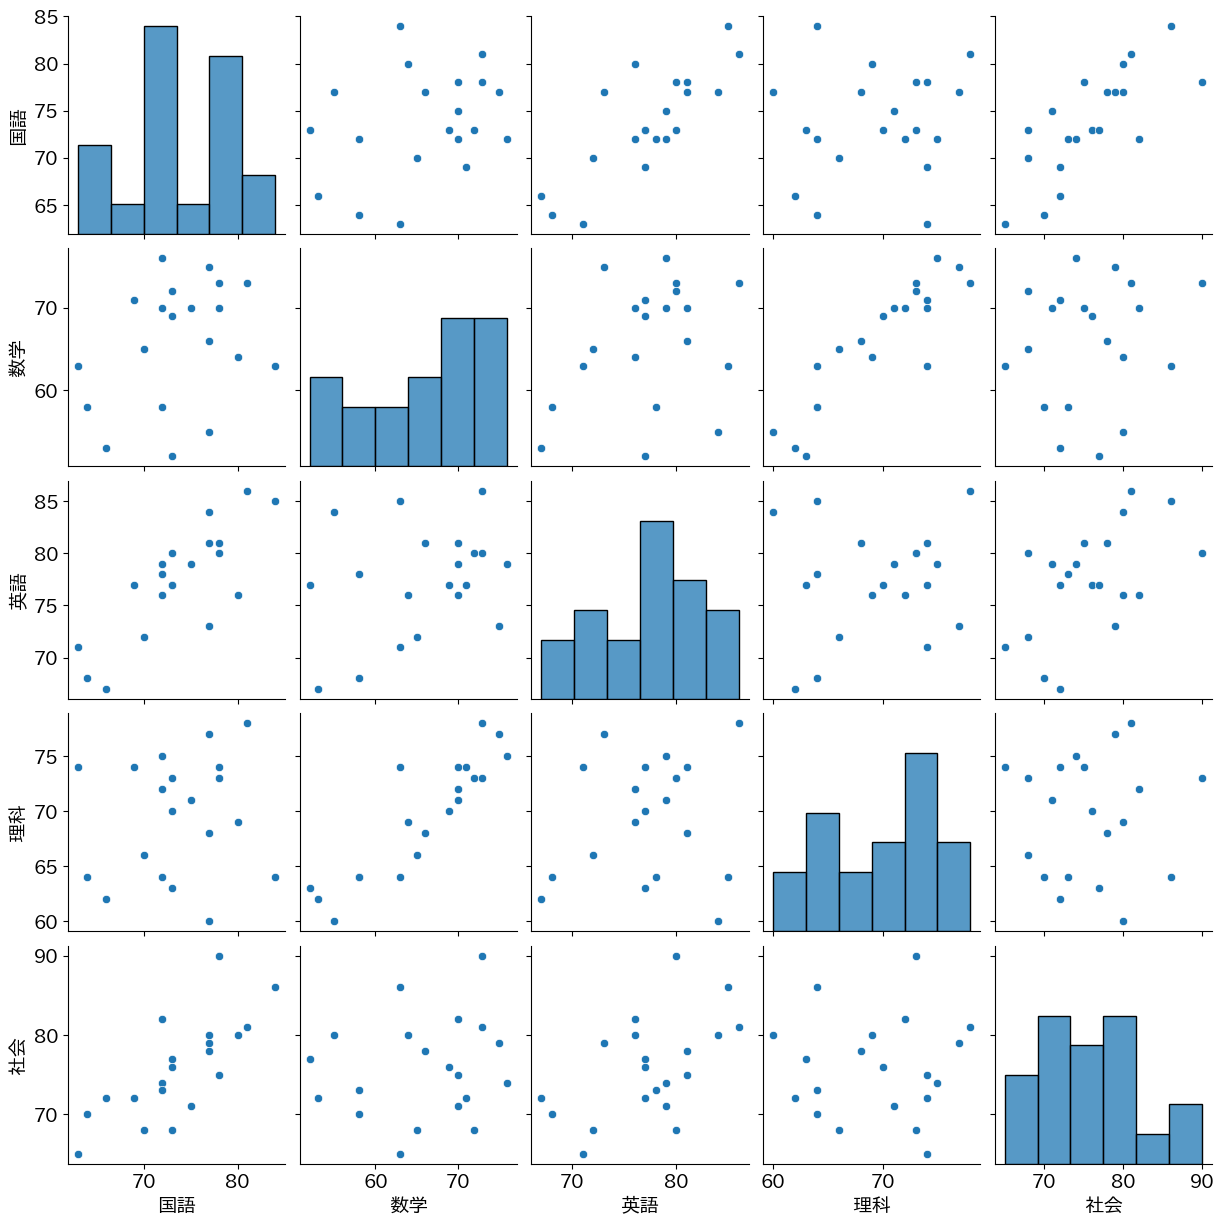

In [ ]:
#コード3-4c
url = 'https://bit.ly/3FjLfTk'
df_exam2 = pd.read_csv(url)
#散布図行列を作成
sns.pairplot(df_exam2)
plt.show()

##分散共分散行列の計算
分散（標本分散／不偏分散）と共分散を行列の形式で並べたものを分散共分散行列と呼ぶ．
分散共分散行列は`cov`メソッドで計算でき，引数には計算対象とする列名のリストを指定する．
また，引数ddofで分散と共分散の分母を指定することができる．
*  `ddof = 0` ⇒ $n$で割った標本分散と共分散（標本共分散）を計算
*  `ddof = 1` ⇒ $n-1$で割った不偏分散と不偏共分散を計算

In [ ]:
#コード3-4d
url = 'https://bit.ly/3FjLfTk'
df_exam2 = pd.read_csv(url)
#国語と数学の分散共分散行列（分母をnとする）
display(df_exam2[['国語', '数学']].cov(ddof = 0))

,国語,数学
国語,29.210,11.840
数学,11.840,51.660


In [ ]:
#コード3-4e
url = 'https://bit.ly/3FjLfTk'
df_exam2 = pd.read_csv(url)
#分散共分散行列の計算
display(df_exam2.cov(ddof = 0))

,国語,数学,英語,理科,社会
国語,29.210,11.840,21.955,3.965,25.105
数学,11.840,51.660,11.270,33.710,7.020
英語,21.955,11.270,25.528,4.508,16.853
理科,3.965,33.710,4.508,27.348,0.682
社会,25.105,7.020,16.853,0.682,37.928


##相関係数の計算
分散共分散行列は`corr`メソッドで計算でき，引数には計算対象とする列名のリストを指定する．結果は，`cov`メソッドと同様に行列形式で表示される．対角成分は，同じ変数同士の相関係数を計算しているので，常に1となる．

In [ ]:
#コード3-4f
url = 'https://bit.ly/3FjLfTk'
df_exam2 = pd.read_csv(url)
#国語と数学の相関係数
display(df_exam2[['国語', '数学']].corr())

,国語,数学
国語,1.000,0.305
数学,0.305,1.000


In [ ]:
#コード3-4g
url = 'https://bit.ly/3FjLfTk'
df_exam2 = pd.read_csv(url)
#相関係数行列
display(df_exam2.corr())

,国語,数学,英語,理科,社会
国語,1.000,0.305,0.804,0.140,0.754
数学,0.305,1.000,0.310,0.897,0.159
英語,0.804,0.310,1.000,0.171,0.542
理科,0.140,0.897,0.171,1.000,0.021
社会,0.754,0.159,0.542,0.021,1.000


##ヒートマップの作成
ヒートマップとは数値データ（ここでは相関係数）の大小を色で視覚化する方法である．  
  
相関係数のヒートマップは，seabornの`heatmap`関数で作成でき，引数に`corr`メソッドで求めた相関係数の行列（ヒートマップで表したいデータ）を指定する．  
  
その他の引数は以下のとおり:
*  `annot = True`: 数値を表示，指定しないとFalse（非表示）
*  `vmin`: データの最小値を指定
*  `vmax`: データの最大値を指定


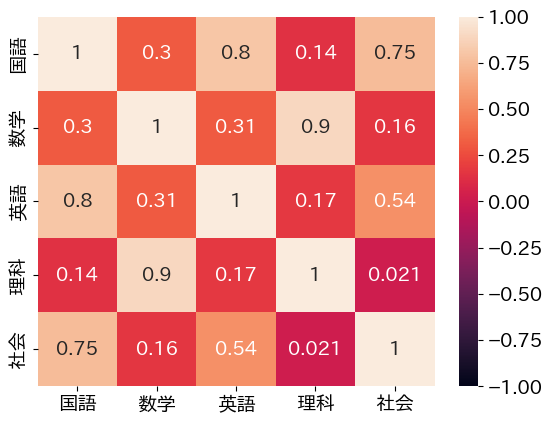

In [ ]:
#コード3-4h
import seaborn as sns
url = 'https://bit.ly/3FjLfTk'
df_exam2 = pd.read_csv(url)
#相関係数の行列を変数rに代入
r = df_exam2.corr()
#ヒートマップの作成
sns.heatmap(r, annot=True, vmin = -1, vmax = 1)
plt.show()